**Recursive inverse**

In [1]:
from common import *
from functions import *
from multiplication import *
import time
import tracemalloc
benchmark_size = 100
step = 10

In [2]:
add_counters = []
sub_counters = []
mul_counters = []
time_counters = []
mem_counters = []

In [3]:
for n in range(1, benchmark_size + 1, step):
    print("Computing n =", n)

    A = randomize_matrix(n)
    A = np.array(A)

    start_time = time.time()
    C = recursive_inverse(A, binet)
    end_time = time.time()
    
    time_counters.append(end_time - start_time)
    reset_counters()

Computing n = 1
Computing n = 11
Computing n = 21
Computing n = 31
Computing n = 41
Computing n = 51
Computing n = 61
Computing n = 71
Computing n = 81
Computing n = 91


In [4]:
for n in range(1, benchmark_size + 1, step):
    common.reset_counters()
    print("Computing n =", n)

    A = randomize_matrix(n)
    A = np.array(A)

    C = recursive_inverse(A, binet)
    
    add_counters.append(common.counter_add)
    mul_counters.append(common.counter_mul)
    sub_counters.append(common.counter_sub)

Computing n = 1
Computing n = 11
Computing n = 21
Computing n = 31
Computing n = 41
Computing n = 51
Computing n = 61
Computing n = 71
Computing n = 81
Computing n = 91


In [5]:
memory_counters = []

for n in range(1, benchmark_size + 1, step):
    print("Computing n =", n)

    A = randomize_matrix(n)
    A = np.array(A)

    tracemalloc.start()
    C = recursive_inverse(A, binet)
    
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    mem_counters.append(peak / 10**6)

Computing n = 1
Computing n = 11
Computing n = 21
Computing n = 31
Computing n = 41
Computing n = 51
Computing n = 61
Computing n = 71
Computing n = 81
Computing n = 91


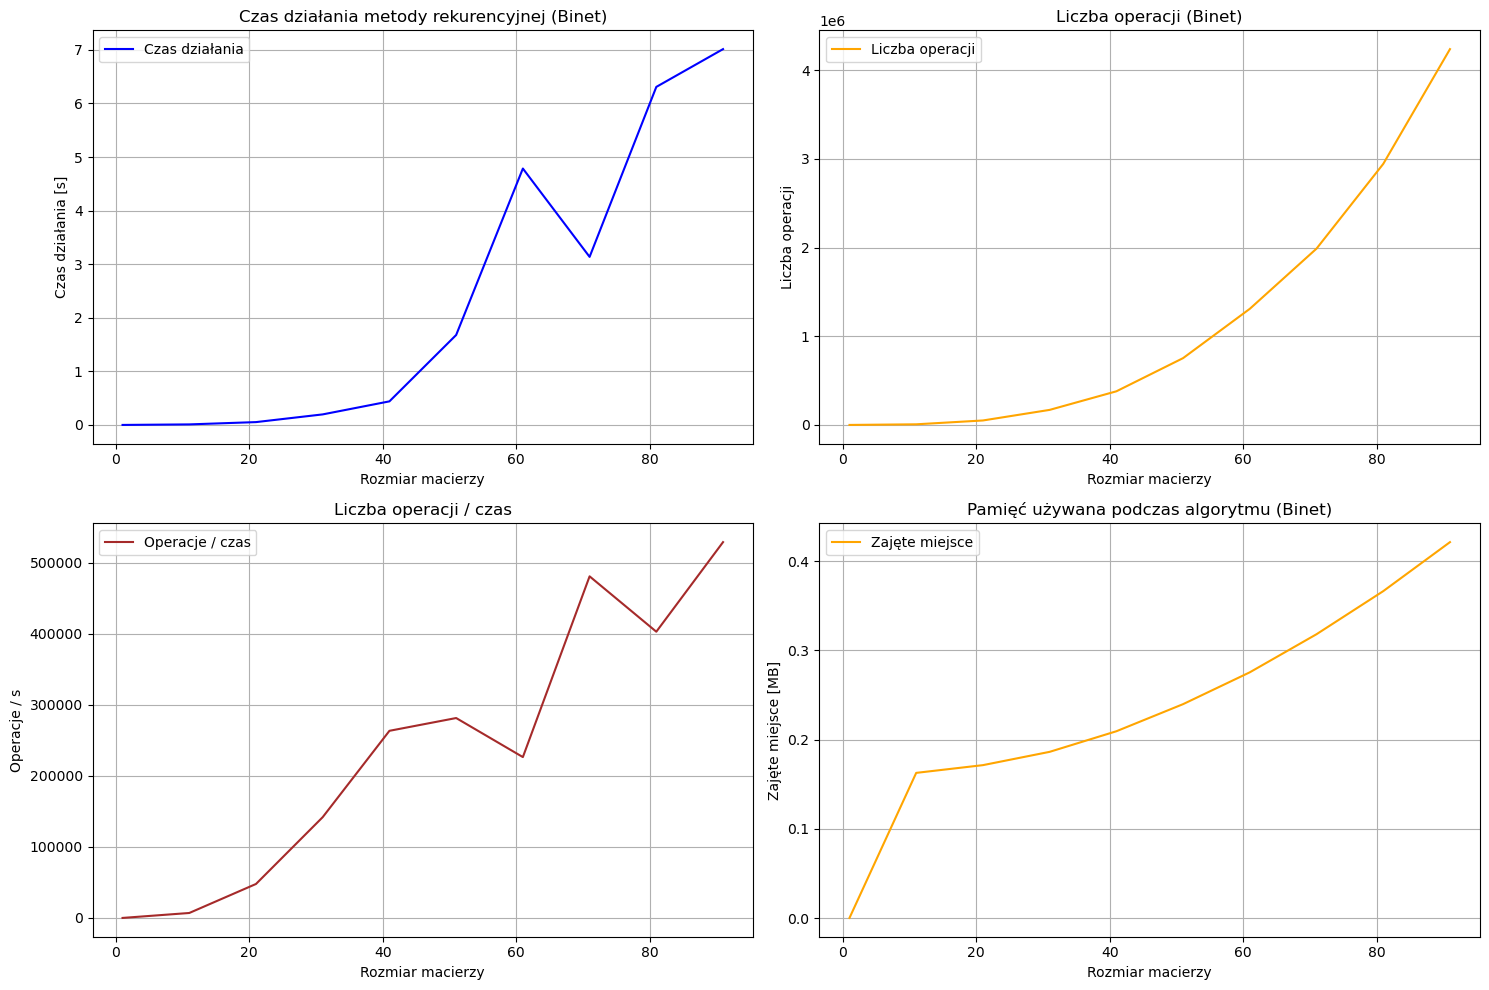

In [6]:
plot_all_metrics(step, time_counters, add_counters, sub_counters, mul_counters, mem_counters, "Binet")

In [7]:
add_counters = []
sub_counters = []
mul_counters = []
time_counters = []
mem_counters = []

In [8]:
for n in range(1, benchmark_size + 1, step):
    print("Computing n =", n)

    A = randomize_matrix(n)
    A = np.array(A)

    start_time = time.time()
    C = recursive_inverse(A, binet)
    end_time = time.time()
    
    time_counters.append(end_time - start_time)
    reset_counters()

Computing n = 1
Computing n = 11
Computing n = 21
Computing n = 31
Computing n = 41
Computing n = 51
Computing n = 61
Computing n = 71
Computing n = 81
Computing n = 91


In [9]:
for n in range(1, benchmark_size + 1, step):
    common.reset_counters()
    print("Computing n =", n)

    A = randomize_matrix(n)
    A = np.array(A)

    C = recursive_inverse(A, binet)
    
    add_counters.append(common.counter_add)
    mul_counters.append(common.counter_mul)
    sub_counters.append(common.counter_sub)

Computing n = 1
Computing n = 11
Computing n = 21
Computing n = 31
Computing n = 41
Computing n = 51
Computing n = 61
Computing n = 71
Computing n = 81
Computing n = 91


In [10]:
memory_counters = []

for n in range(1, benchmark_size + 1, step):
    print("Computing n =", n)

    A = randomize_matrix(n)
    A = np.array(A)

    tracemalloc.start()
    C = recursive_inverse(A, binet)
    
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    mem_counters.append(peak / 10**6)

Computing n = 1
Computing n = 11
Computing n = 21
Computing n = 31
Computing n = 41
Computing n = 51
Computing n = 61
Computing n = 71
Computing n = 81
Computing n = 91


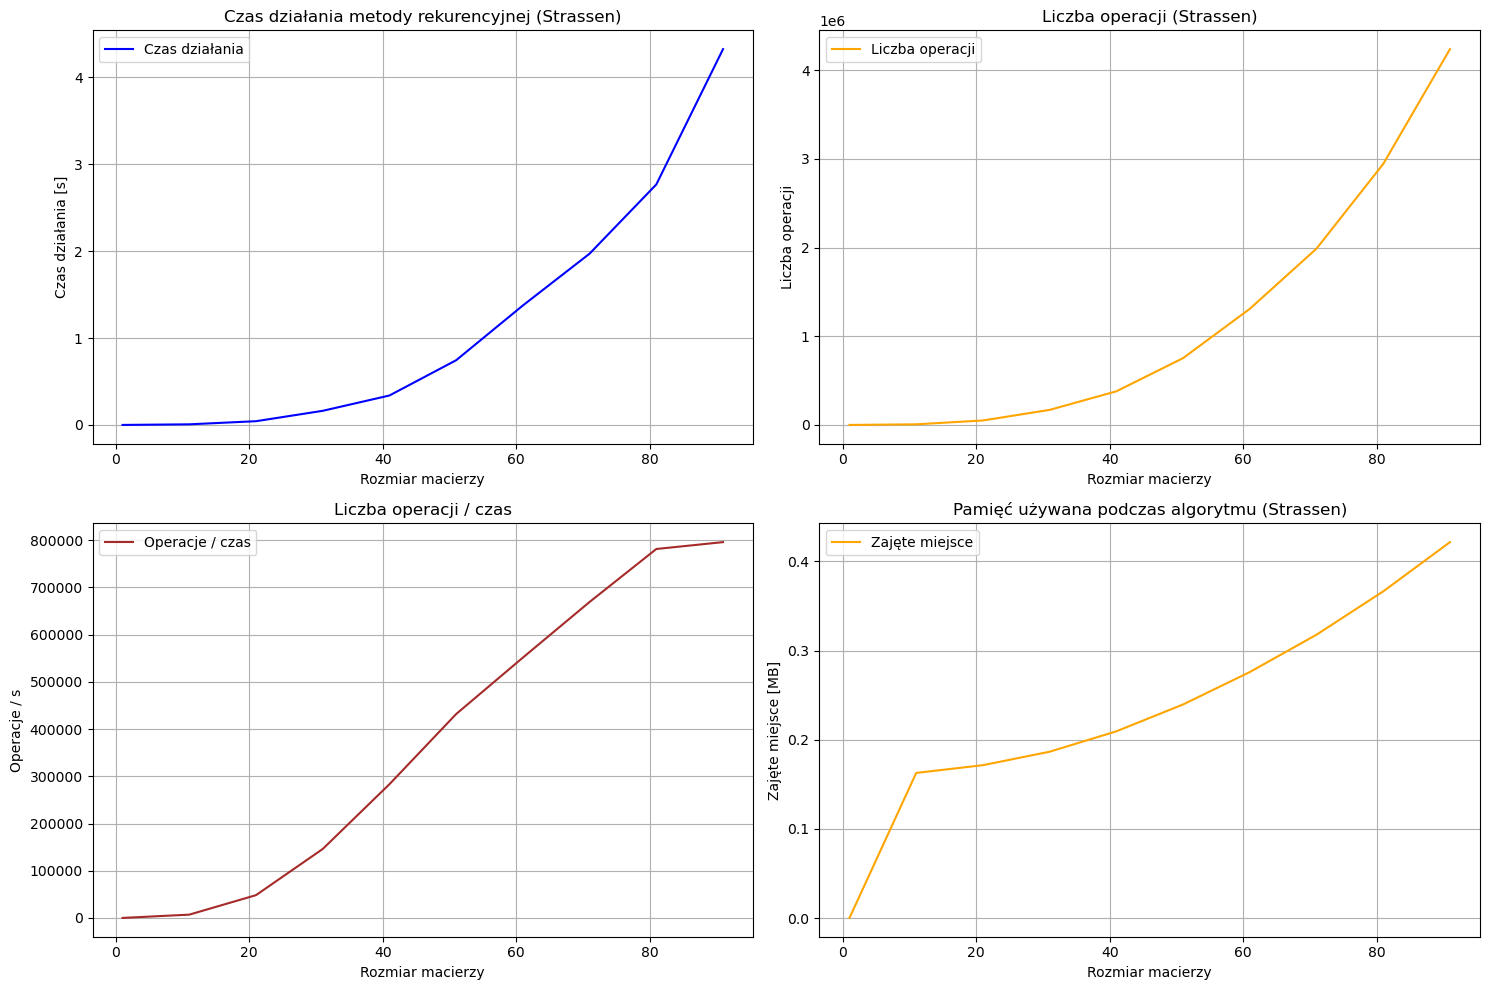

In [11]:
plot_all_metrics(step, time_counters, add_counters, sub_counters, mul_counters, mem_counters, "Strassen")